# Split Data 

In [1]:
import pandas as pd 
import numpy as np 
import joblib

In [2]:
df = pd.read_csv("BMW_Car_Sales_Classification.csv")
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [3]:
X = df.drop(columns = ['Sales_Classification'])
y = df['Sales_Classification']

In [4]:
# Map target labels to binary
y = y.map({'Low': 0, 'High': 1})

In [5]:
y.values

array([1, 0, 0, ..., 1, 1, 0], shape=(50000,))

## Numerical & Categorical

In [7]:
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

In [8]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_trian , y_test = train_test_split(X , y , test_size=0.2 , random_state=42 , stratify=y)

## Scalling & Encoding & Pipeline 

In [9]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# preproccessor 

features = [('num' , numerical_transformer , numeric_features) , ('cat' , categorical_transformer , categorical_features)]

preprocessor = ColumnTransformer(features)

# build pipeline 

steps = [('preprcoess', preprocessor), ('RF',RandomForestClassifier(random_state=42, n_estimators=100))]

pipeline = Pipeline(steps)

## Train Model 

In [ ]:
pipeline.fit(X_train , y_trian)
joblib.dump(pipeline , "../src/model/model.pkl")

['../src/model/random_forest.pkl']

## Confusion Matrix

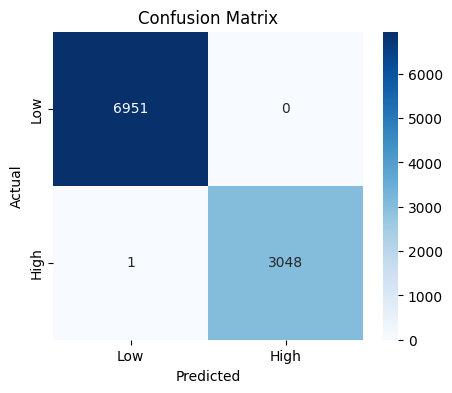

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# predict : 

y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [12]:
# REPORT : 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6951
           1       1.00      1.00      1.00      3049

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



## ROC 
### Receiver-operating characteristic curve

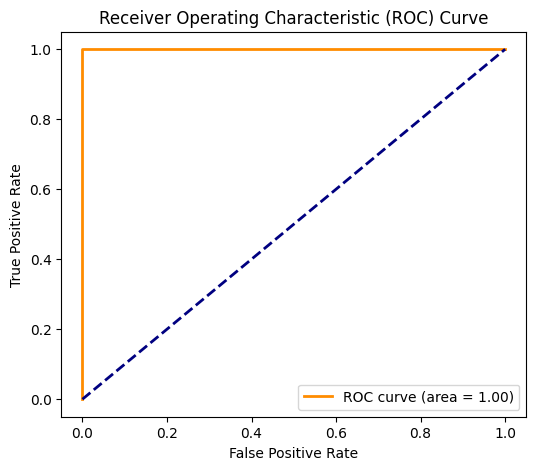

In [13]:
y_proba = pipeline.predict_proba(X_test)[:, 1] # get the positive class of all rows 

# for test : print(pipeline.predict_proba(X_test))

fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2,label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Test for Production Later

In [14]:
sample = [['i8', 2013, 'North America', 'Red', 'Hyprid', 'Auromatic',
           1.6, 121671, 79219, 3428]]

columns = ['Model','Year','Region','Color','Fuel_Type','Transmission', 'Engine_Size_L', 'Mileage_KM' , 'Price_USD','Sales_Volume']

df_sample = pd.DataFrame(sample, columns=columns)

print('Low' if pipeline.predict(df_sample)[0] == 0 else 'High')

Low
